<a href="https://colab.research.google.com/github/Rohan7767/PCB_Component_Detection/blob/main/PCB_component_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sun Oct 27 07:17:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 24.27 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.


In [1]:
!pip install -U -r /content/drive/MyDrive/Real_PCB/yolov5/requirements.txt

In [14]:
!pip install "numpy<2.0"

In [2]:
%cd /content/drive/MyDrive/Real_PCB

/content/drive/MyDrive/Real_PCB


In [5]:
!python ./yolov5/train.py --img 416 --batch 16 --epochs 100 --data ./Dataset/pcb_data/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights /content/drive/MyDrive/Real_PCB --name yolov5s_results  --cache --device 0

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      65/99      1.97G     0.0303    0.04304   0.004378        117        416: 100% 70/70 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:02<00:00,  2.41it/s]
                   all        200       1765      0.978      0.882       0.87      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0% 0/70 [00:00<?, ?it/s]/content/drive/MyDrive/Real_PCB/./yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      66/99      1.97G    0.02832    0.04546   0.004335        232        416:   1% 1/70 [00:00<00:13,  4.94it/s]/content/drive/MyDrive/Real_PCB/./yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast(

In [9]:
!python ./yolov5/detect.py --weights /content/drive/MyDrive/Real_PCB/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source https://img.joomcdn.net/9d4216f07e3608d63868bd183094a933b0923247_original.jpeg

detect: weights=['/content/drive/MyDrive/Real_PCB/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=https://img.joomcdn.net/9d4216f07e3608d63868bd183094a933b0923247_original.jpeg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://img.joomcdn.net/9d4216f07e3608d63868bd183094a933b0923247_original.jpeg locally at 9d4216f07e3608d63868bd183094a933b0923247_original.jpeg
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s excee

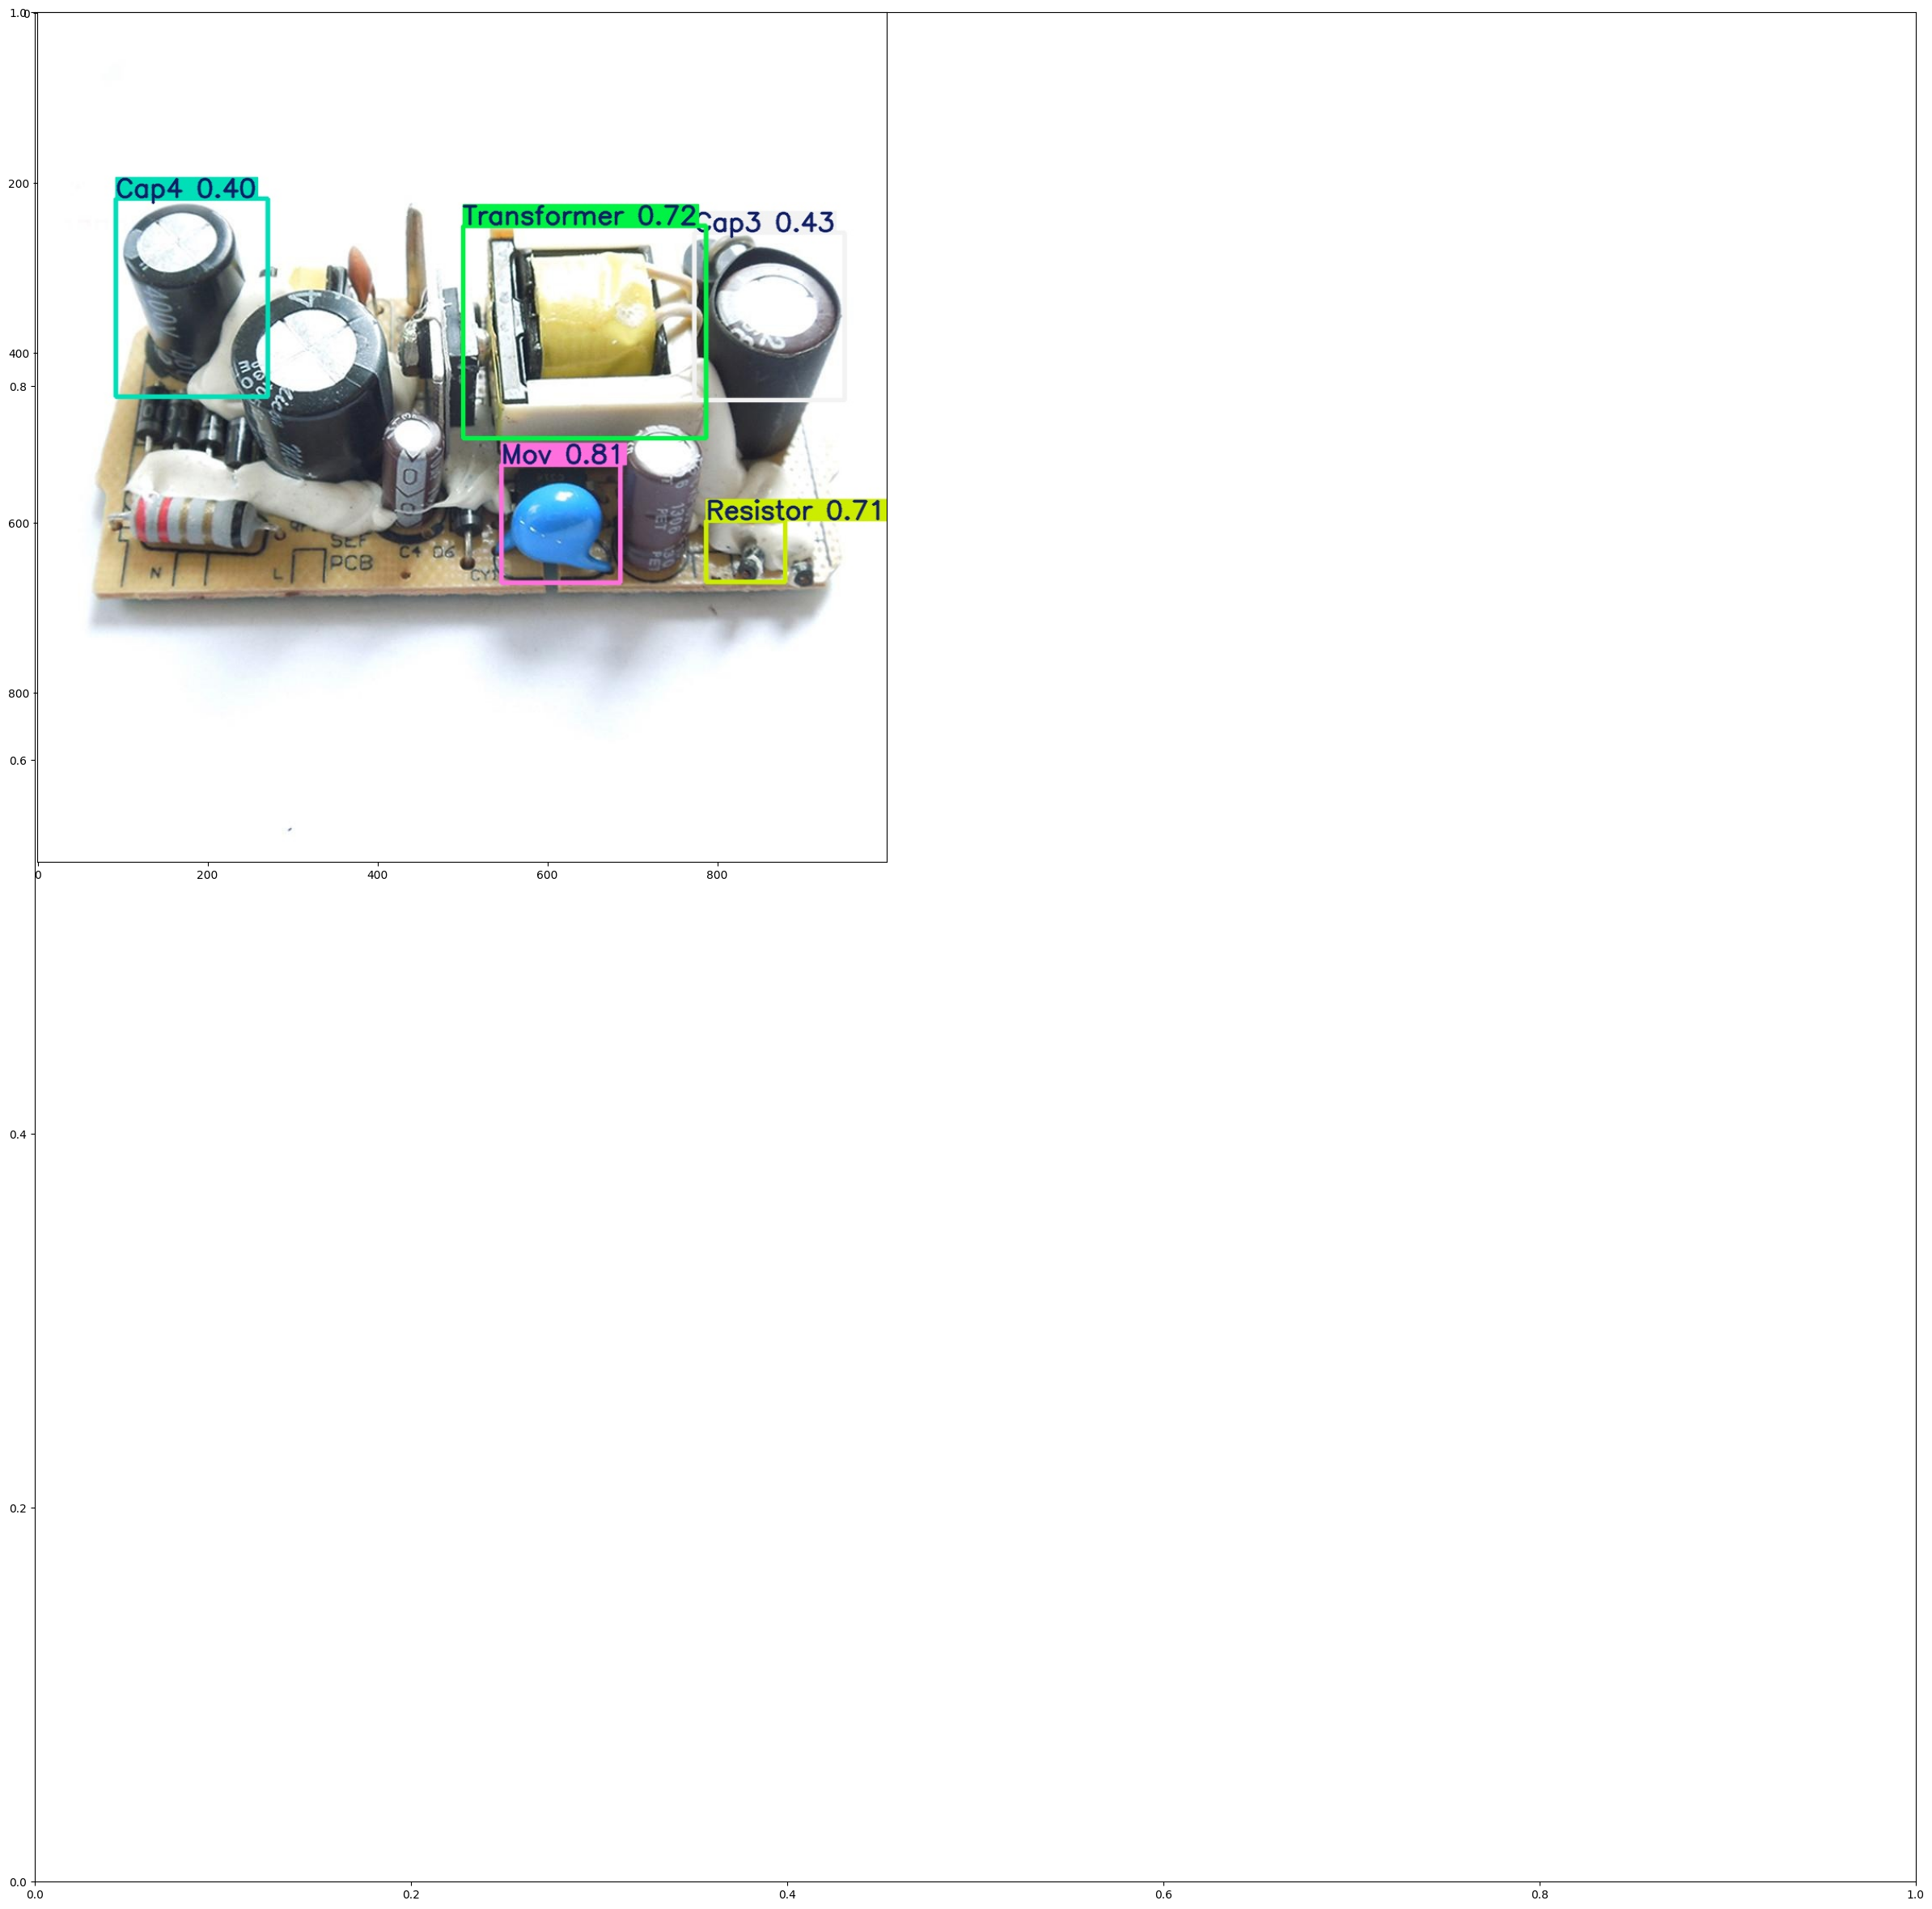

In [13]:
from PIL import Image
import os
import matplotlib.pyplot as plt
src = '/content/drive/MyDrive/Real_PCB/yolov5/runs/detect/exp4'
files = os.listdir(src)
for idx, image_src in enumerate(files):
  image_path = os.path.join(src, image_src)
  image = Image.open(image_path,"r")
  plt.subplots(figsize=(30, 30))
  plt.subplot(2,2, (idx+1)), plt.imshow(image, cmap='gray')
plt.show()